Observable Trends

The temperature is maximum at 0 degree latitude (at the equator) and reduces as we move away from the equator.
The wind speed is less near the equator. It increases as we move away.
The weather is highly humid near the equator but reduces as we move away from the equator.
The cloudiness is less near to the equator but its more cloudy as we move away from the equator!
Apart from Latitude ,there are so many other factors that affect the above weather variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
from citipy import citipy
from datetime import datetime
import random
gkey='acd555755ff5c8ccbb0e1e53288ddb08'

In [2]:
# generate random 500 latitude and longitude values
lat = np.random.uniform(low=-90, high=90, size=(1400,))
lon = np.random.uniform(low=-180, high=180, size=(1400,))

weather_df = pd.DataFrame({"Lat": lat,"Lon":lon})
weather_df["City"]=""
weather_df["Country Code"]=""
weather_df["Max Temp"]=""
weather_df["Humidity"]=""
weather_df["Cloudiness"]=""
weather_df["Wind Speed"]=""
weather_df.head()

,Lat,Lon,City,Country Code,Max Temp,Humidity,Cloudiness,Wind Speed
0,-77.437449,115.184420,,,,,,
1,-60.365915,99.793242,,,,,,
2,50.348041,79.898887,,,,,,
3,-21.386593,-123.099886,,,,,,
4,-64.567933,164.242027,,,,,,


In [3]:
# Genearte cities list

for index,row in weather_df.iterrows():
    
    city = citipy.nearest_city(row['Lat'],row['Lon'])
    city_name = city.city_name
    city_country_code = city.country_code
    
    weather_df.set_value(index,"City",city_name)
    weather_df.set_value(index,"Country Code",city_country_code)
    
# creating a list of unique number of cities
# dropping the duplicates and keeping the first city name
weather_unique_df = weather_df.drop_duplicates(['City'], keep='first')

# number of unique cities in the list
len(weather_unique_df)

574

In [4]:
# Perform API Calls

print('Beginning Data Retrieval')
print('-----------------------------')

for index,row in weather_unique_df.iterrows():
   
    print(f'Processing Record {index} | {row["City"]}')
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&APPID=%s" %(row["City"].replace(" ","+"), gkey)

    resp = requests.get(target_url).json()
 
    try:
        weather_unique_df.set_value(index,"Max Temp",resp["main"]["temp"])
        weather_unique_df.set_value(index,"Humidity",resp['main']['humidity'])
        weather_unique_df.set_value(index,"Cloudiness",resp['clouds']['all'])
        weather_unique_df.set_value(index,"Wind Speed",resp['wind']['speed'])
        
    except KeyError:
        print("oops !! missing values")
        
print("--------------------------")    
print("Data Retrieval Complete!")
print("--------------------------")
#weather_unique_df.head()


Beginning Data Retrieval
-----------------------------
Processing Record 0 | albany
Processing Record 1 | busselton
Processing Record 2 | semey
Processing Record 3 | rikitea
Processing Record 4 | bluff
Processing Record 5 | cherskiy
Processing Record 6 | souillac
Processing Record 7 | port hardy
Processing Record 8 | new norfolk
Processing Record 9 | ambon
Processing Record 10 | atuona
Processing Record 11 | port blair
Processing Record 12 | naze
Processing Record 13 | barentsburg
oops !! missing values
Processing Record 14 | port pirie
Processing Record 15 | airai
Processing Record 16 | jamestown
Processing Record 17 | lagoa
Processing Record 18 | klaksvik
Processing Record 19 | coquimbo
Processing Record 20 | attawapiskat
oops !! missing values
Processing Record 21 | provideniya
Processing Record 22 | tuktoyaktuk
Processing Record 23 | kutum
Processing Record 24 | tasiilaq
Processing Record 25 | bredasdorp
Processing Record 26 | punta arenas
Processing Record 27 | kapaa
Processing Re

Processing Record 392 | taua
Processing Record 394 | at-bashi
Processing Record 395 | elko
Processing Record 399 | santa rosa
Processing Record 404 | kurumkan
Processing Record 407 | ilulissat
Processing Record 408 | pareora
Processing Record 411 | ajaccio
Processing Record 414 | pisco
Processing Record 415 | acarau
oops !! missing values
Processing Record 416 | bolshiye klyuchishchi
oops !! missing values
Processing Record 424 | dhidhdhoo
Processing Record 428 | hobart
Processing Record 430 | sulphur
Processing Record 431 | kargala
Processing Record 433 | ahuimanu
Processing Record 434 | ust-nera
Processing Record 437 | sibu
Processing Record 438 | yaan
Processing Record 444 | camacha
Processing Record 448 | karkaralinsk
oops !! missing values
Processing Record 449 | tura
Processing Record 450 | georgiyevka
Processing Record 452 | tiznit
Processing Record 453 | kargapolye
oops !! missing values
Processing Record 457 | nuuk
Processing Record 458 | marsh harbour
Processing Record 460 | 

Processing Record 998 | murgab
Processing Record 1001 | mocajuba
Processing Record 1018 | sao jose do rio pardo
Processing Record 1019 | lima
Processing Record 1021 | kulhudhuffushi
Processing Record 1025 | astoria
Processing Record 1026 | tunduru
oops !! missing values
Processing Record 1029 | eureka
Processing Record 1032 | guaruja
Processing Record 1034 | tual
Processing Record 1035 | louisbourg
oops !! missing values
Processing Record 1037 | leh
Processing Record 1042 | kerteh
oops !! missing values
Processing Record 1044 | port keats
Processing Record 1047 | sistranda
Processing Record 1049 | yulara
Processing Record 1050 | korla
oops !! missing values
Processing Record 1051 | nantucket
Processing Record 1057 | mbuguni
Processing Record 1059 | college
Processing Record 1062 | shelburne
Processing Record 1065 | puerto rico
Processing Record 1066 | sidi bin nur
Processing Record 1072 | kailua
Processing Record 1079 | lukiv
Processing Record 1081 | tateyama
Processing Record 1082 | a

In [5]:
# replacing the empty spaces with NaN values
weather_clean_df = weather_unique_df.replace(r'\s+', np.nan).replace('',np.nan)

In [7]:
# Dropping the rows with NaN values
weather_clean_df = weather_clean_df.dropna(how='any')
weather_clean_df = weather_clean_df.round({"Lat":2,"Lon":2})
weather_clean_df.reset_index()
#  display the dataframe with retrieved Data

weather_clean_df.to_csv('weatherAPI.csv',index=False)
weather_clean_df.head()

,Lat,Lon,City,Country Code,Max Temp,Humidity,Cloudiness,Wind Speed
0,-77.44,115.18,albany,au,36.43,95.0,75.0,7.38
1,-60.37,99.79,busselton,au,80.69,72.0,0.0,17.78
2,50.35,79.90,semey,kz,-27.50,43.0,20.0,6.71
3,-21.39,-123.10,rikitea,pf,78.17,100.0,44.0,17.00
4,-64.57,164.24,bluff,nz,95.36,31.0,0.0,11.07


In [8]:
# making sure, we have 500+ cities in our data frame
weather_clean_df.count()

Lat             511
Lon             511
City            511
Country Code    511
Max Temp        511
Humidity        511
Cloudiness      511
Wind Speed      511
dtype: int64

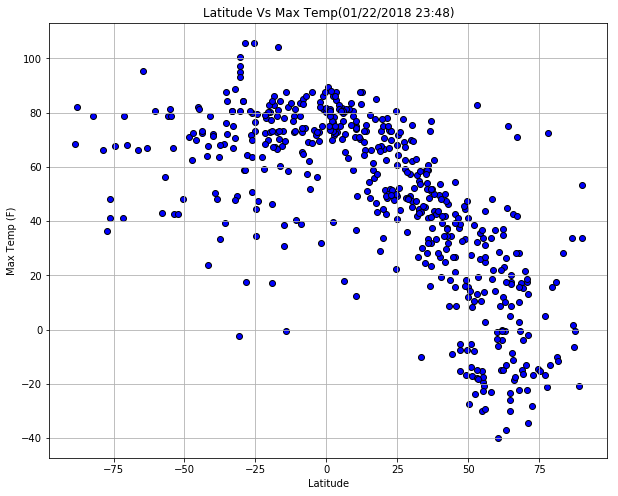

In [9]:
#scatter plots
#Latitude vs Temperature PLot

Lat = weather_clean_df["Lat"].tolist()
temp = weather_clean_df["Max Temp"].tolist()

# enlarging the size of the plot and setting grid lines
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x=Lat,y=temp,marker="o",facecolors="blue",edgecolors='black')

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Latitude Vs Max Temp({datetime.now().strftime('%m/%d/%Y %H:%M')})")

plt.show()

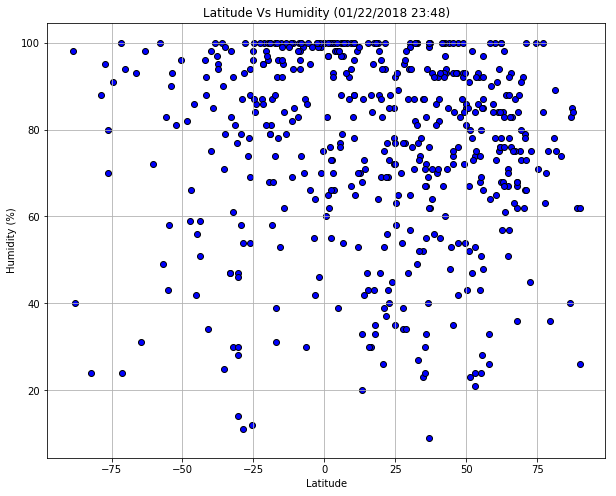

In [10]:
#Latitude Vs Humidity PLot

Lat = weather_clean_df["Lat"].tolist()
hum = weather_clean_df["Humidity"].tolist()

# enlarging the size of the plot and setting grid lines
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x=Lat,y=hum,marker="o",facecolors="blue",edgecolors='black')

plt.title(f"Latitude Vs Humidity ({datetime.now().strftime('%m/%d/%Y %H:%M')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

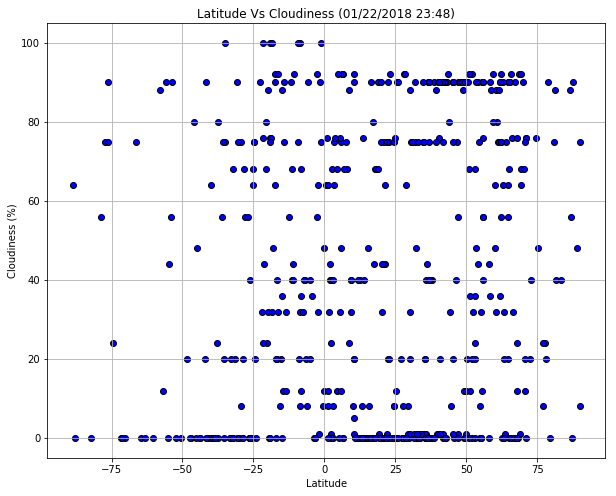

In [11]:
#Latitude Vs Cloudiness Plot

Lat = weather_clean_df["Lat"].tolist()
cloud = weather_clean_df["Cloudiness"].tolist()

# enlarging the size of the plot and setting grid lines
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x=Lat,y=cloud,marker="o",facecolors="blue",edgecolors='black')

plt.title(f"Latitude Vs Cloudiness ({datetime.now().strftime('%m/%d/%Y %H:%M')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

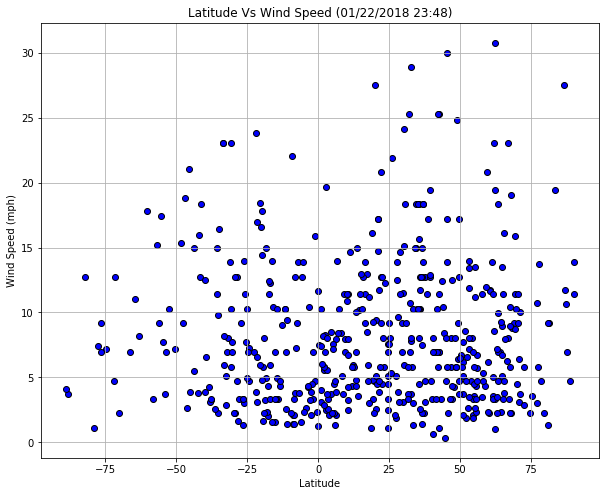

In [12]:
#Latitude vs Wind Speed plot

Lat = weather_clean_df["Lat"].tolist()
wind = weather_clean_df["Wind Speed"].tolist()

# enlarging the size of the plot and setting grid lines
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x=Lat,y=wind,marker="o",facecolors="blue",edgecolors='black')

plt.title(f"Latitude Vs Wind Speed ({datetime.now().strftime('%m/%d/%Y %H:%M')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()